In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv('C:/Users/pejma/Nextcloud/PDE model/Final2/random_dataset_8Apr.csv')
df2 = pd.read_csv('C:/Users/pejma/Nextcloud/PDE model/Final2/dataset_8_Apr.csv')

In [2]:
# iw = df2['IW']
# plt.figure(figsize=(10, 6))
# plt.hist(iw, bins=30, alpha=0.7, color='blue', edgecolor='black')
# plt.title('Histogram of Y (IW Values)')
# plt.xlabel('IW Value')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

In [3]:
# Split the data into training and test sets
df['m2_m1_ratio_rand'] = df['m2_1'] / df['m1_1']
df2['m2_m1_ratio_1'] = df2['m2_1'] / df2['m1_1']
df2['m2_m1_ratio_2'] = df2['m2_2'] / df2['m1_2']
df2['m2_m1_ratio_3'] = df2['m2_3'] / df2['m1_3']
df2['m2_m1_ratio_4'] = df2['m2_4'] / df2['m1_4']
df2['m2_m1_ratio_5'] = df2['m2_5'] / df2['m1_5']
df2['m2_m1_ratio_rand'] = df['m2_m1_ratio_rand']

In [7]:
# Calculate the first quartile (Q1) of the 'IW' column
Q1 = df2['IW'].quantile(0.25)

# Separate the dataset into two based on Q1
nodular = df2[df2['IW'] <= Q1]
infiltrative = df2[df2['IW'] > Q1]
infiltrative.describe()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_at1,...,p_4,p_5,T1_MRI,FLAIR_MRI,m2_m1_ratio_1,m2_m1_ratio_2,m2_m1_ratio_3,m2_m1_ratio_4,m2_m1_ratio_5,m2_m1_ratio_rand
count,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,...,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000,14736.000000
mean,0.016411,0.166053,0.062256,0.599829,0.051604,0.050620,0.350062,0.251164,43.767814,14.689230,...,18.836685,17.323820,22.034637,40.330508,12.691452,12.880795,13.077683,12.157782,10.835591,13.057668
std,0.006646,0.065470,0.030835,0.115577,0.028524,0.028621,0.143966,0.086612,12.549424,5.132731,...,11.128368,10.516290,7.305288,13.174907,7.440589,7.768934,8.444080,8.879158,8.843599,8.119797
min,0.002731,0.021762,0.005737,0.400000,0.001006,0.001001,0.100010,0.100010,26.600000,4.500000,...,2.479352,1.856527,7.235612,14.972895,0.006895,0.006216,0.004863,0.002164,0.001505,0.004745
25%,0.011030,0.112855,0.036193,0.499630,0.027074,0.025787,0.226002,0.176608,33.600000,11.000000,...,10.972427,9.964197,16.312883,29.549111,7.850743,7.880119,7.692217,6.210542,4.020158,7.877845
50%,0.016754,0.170220,0.063227,0.599600,0.052172,0.050574,0.350425,0.251805,42.000000,14.000000,...,16.159550,14.881174,21.427308,38.666995,11.180193,11.296233,11.409331,10.582960,9.353211,11.427646
75%,0.022127,0.222185,0.088968,0.699965,0.076535,0.075431,0.474550,0.326603,51.800000,17.000000,...,23.702084,21.813810,26.697091,49.493121,16.391798,16.694998,17.116944,16.392400,15.123365,17.030337
max,0.027300,0.272990,0.114000,0.799990,0.100000,0.099996,0.599960,0.399980,92.400000,38.000000,...,85.519733,83.904767,62.545124,84.756538,66.708452,73.657202,92.463572,99.861742,86.209370,83.441405


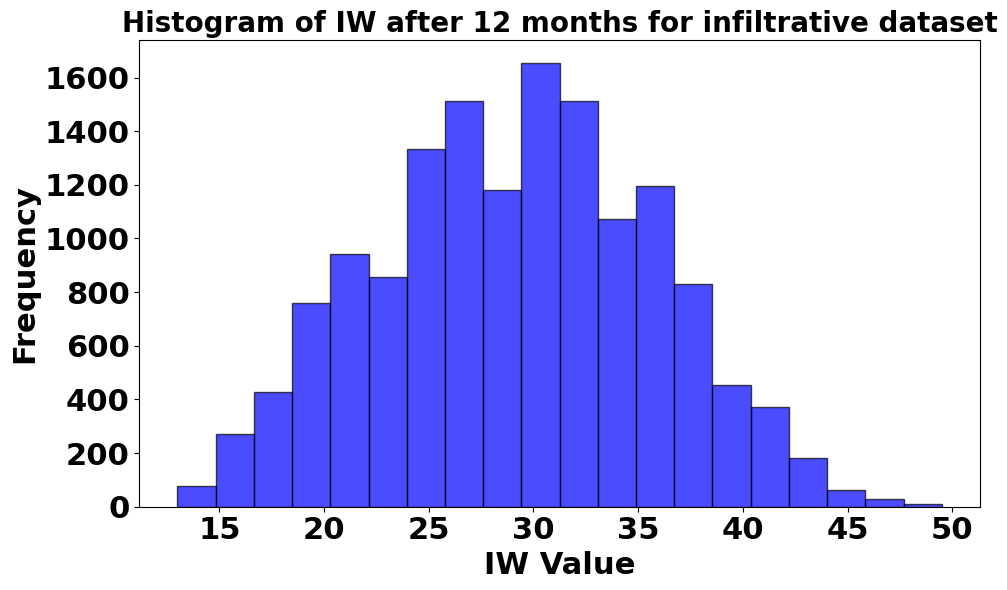

In [9]:
iw = infiltrative['IW_at3']
plt.figure(figsize=(10, 6))
# Create histogram
plt.hist(iw, bins=20, alpha=0.7, color='blue', edgecolor='black')
# Set title with larger, bold font
plt.title('Histogram of IW after 12 months for infiltrative dataset', fontsize=20, fontweight='bold')
# Set labels with larger, bold font
plt.xlabel('IW Value', fontsize=22, fontweight='bold')
plt.ylabel('Frequency', fontsize=22, fontweight='bold')
# Set tick labels with increased size and bold
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
# Ensure the plot displays neatly
plt.tight_layout()

In [15]:
def add_noise_to_dataset(dataset, features, sigma):
    """
    Adds Gaussian noise to specified features within a dataset.
    Args:
    - dataset (pd.DataFrame): The original pandas DataFrame.
    - features (list): A list of column names to which noise will be added.
    - sigma (float): The standard deviation of the Gaussian noise.
    
    Returns:
    - pd.DataFrame: A new DataFrame with noise added to the specified features.
    """
    noisy_dataset = dataset.copy()
    for feature in features:
        if feature in noisy_dataset.columns:
            # Generate noise
            noise = np.random.normal(0, sigma, size=noisy_dataset[feature].shape)
            # Add noise to the feature
            noisy_dataset[feature] += noise
        else:
            print(f"Feature {feature} not found in DataFrame.")
    return noisy_dataset
# Assuming df2 and nodular are already defined
np.random.seed(1)  # Ensure reproducibility
features = ['ki67', 'm2_m1_ratio_1', 'm2_m1_ratio_5', 'm2_m1_ratio_rand']
# Original nodular dataset without noise
infiltrative_no_noise = infiltrative.copy()
# Weak noise (sigma=1)
infiltrative_weak_noise = add_noise_to_dataset(infiltrative, features, sigma=1)
# Moderate noise (sigma=5)
infiltrative_moderate_noise = add_noise_to_dataset(infiltrative, features, sigma=5)
# Strong noise (sigma=10)
infiltrative_strong_noise = add_noise_to_dataset(infiltrative, features, sigma=10)

In [8]:
# # Calculate the first quartile (Q1) of the 'IW' column
# Q1 = df2['IW'].quantile(0.25)
# # Separate the dataset into two based on Q1
# nodular = df2[df2['IW'] <= Q1]
# infiltrative = df2[df2['IW'] > Q1]
# # Plotting
# plt.figure(figsize=(10, 6))
# # Histogram for nodular
# plt.hist(nodular['IW'], alpha=0.9, label='Nodular (IW <= Q1)',color = 'grey')
# # Histogram for infiltrative
# plt.hist(infiltrative['IW'], alpha=0.6, label='Infiltrative (IW > Q1)')
# plt.xlabel('IW Value')
# plt.ylabel('Frequency')
# plt.title('Distribution of IW Values - Nodular vs. Infiltrative')
# plt.legend()
# plt.show()

In [9]:
# # Calculate the first quartile (Q1) of the 'IW' column
# Q1 = df2['IW'].quantile(0.25)
# # Separate the dataset into two based on Q1
# nodular = df2[df2['IW'] <= Q1]
# infiltrative = df2[df2['IW'] > Q1]
# # Plotting
# plt.figure(figsize=(10, 6))
# # Histogram for nodular
# plt.hist(nodular['IW'], alpha=0.9, label='Nodular (IW <= Q1)',color = 'grey')
# # Histogram for infiltrative
# # plt.hist(infiltrative['IW'], alpha=0.6, label='Infiltrative (IW > Q1)')
# plt.xlabel('IW Value')
# plt.ylabel('Frequency')
# plt.title('Distribution of IW Values - Nodular vs. Infiltrative')
# plt.legend()
# plt.show()

In [10]:
# # Function to prepare data, train model, and visualize feature importance
# def prepare_train_visualize(dataset, title_suffix):
#     # Prepare the features (X) and target (Y)
#     X = dataset.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
#                               'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
#                               'm2_m1_ratio_3', 'm2_m1_ratio_4'])
#     Y = dataset['IW_at1'].values

#     # Split the data into training and test sets
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#     # Train the Gradient Boosting model
#     gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
#     gb_optimized.fit(X_train, Y_train)

#     # Feature importance visualization
#     feature_importance = gb_optimized.feature_importances_
#     features = X_train.columns
#     sorted_idx = feature_importance.argsort()
#     plt.figure(figsize=(10, 8))
#     plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
#     plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx], fontsize=12)
#     plt.xticks(fontsize=12)
#     plt.title(f'Feature Importance Visualization {title_suffix}', fontsize=16)
#     plt.show()

# # Assuming nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise are defined
# prepare_train_visualize(nodular_no_noise, "No Noise")
# prepare_train_visualize(nodular_weak_noise, "Weak Noise")
# prepare_train_visualize(nodular_moderate_noise, "Moderate Noise")
# prepare_train_visualize(nodular_strong_noise, "Strong Noise")


In [13]:
def get_feature_importances(dataset):
    # Prepare the features (X) and target (Y)
    X = dataset.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                              'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                              'm2_m1_ratio_3', 'm2_m1_ratio_4'])
    Y = dataset['IW_at3'].values

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    # Standardize the features
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    # Train the Gradient Boosting model on the standardized features
    gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
    gb_optimized.fit(X_train_standardized, Y_train)  # Use standardized features here

    # Return the feature importances
    feature_importance = gb_optimized.feature_importances_
    return feature_importance  

# Assuming datasets are prepared: nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise
datasets = {
    "Zero Noise": infiltrative_no_noise,
    "Weak Noise": infiltrative_weak_noise,
    "Moderate Noise": infiltrative_moderate_noise,
    "Strong Noise": infiltrative_strong_noise
}

# Prepare the features for labeling the x-axis in the plot
features = infiltrative_no_noise.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                                          'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                                          'm2_m1_ratio_3', 'm2_m1_ratio_4']).columns

# Initialize a dictionary to hold the feature importance from each dataset
all_importances = {noise_level: get_feature_importances(dataset) for noise_level, dataset in datasets.items()}


NameError: name 'infiltrative_no_noise' is not defined

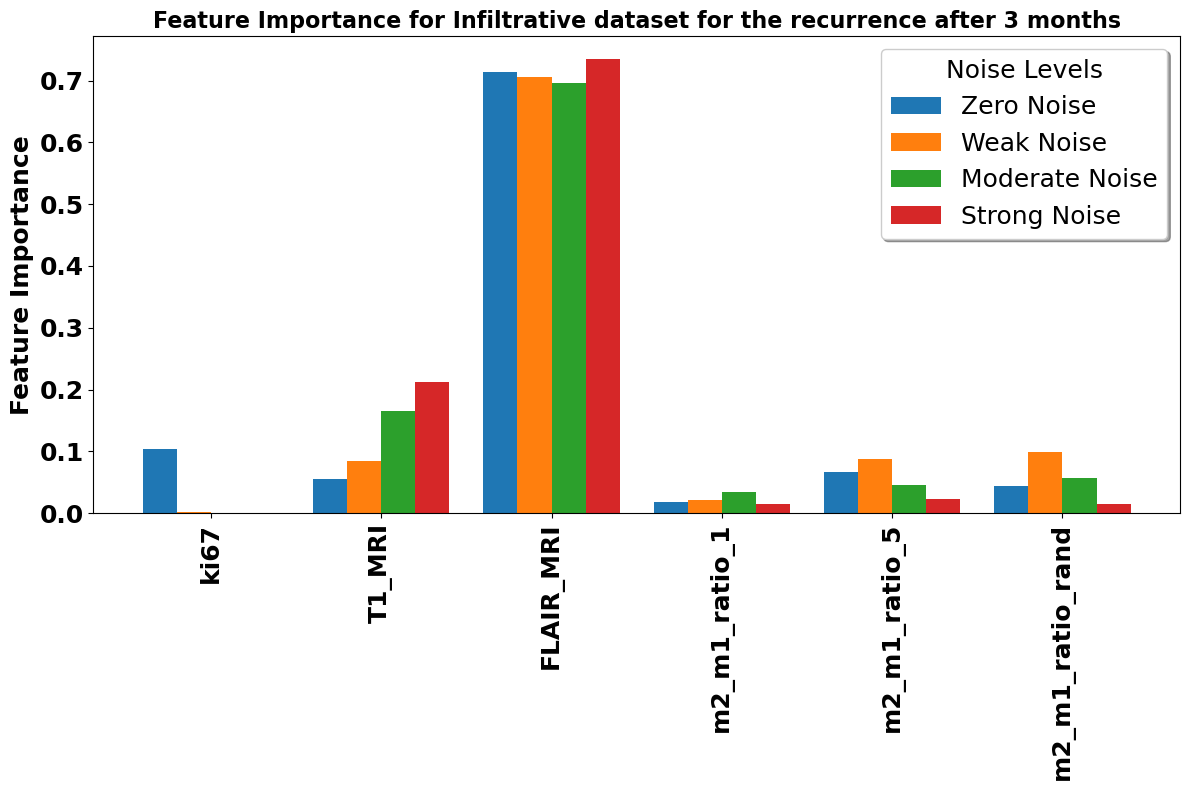

In [65]:

# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(12, 8))
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)
# Add xticks on the middle of the group bars
# plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Importance', fontsize=18, fontweight='bold')
# plt.xlabel('Features', fontsize=18, fontweight='bold')  # Un-commented and set font size and weight
plt.xticks([p + bar_width/2 * (len(all_importances)-1) for p in positions], features, rotation='vertical', fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.title('Feature Importance for Infiltrative dataset for the recurrence after 3 months', fontsize=16, fontweight='bold')

# Create legend & Show the plot
plt.legend(fontsize=18, title='Noise Levels', title_fontsize='18', frameon=True, shadow=True)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

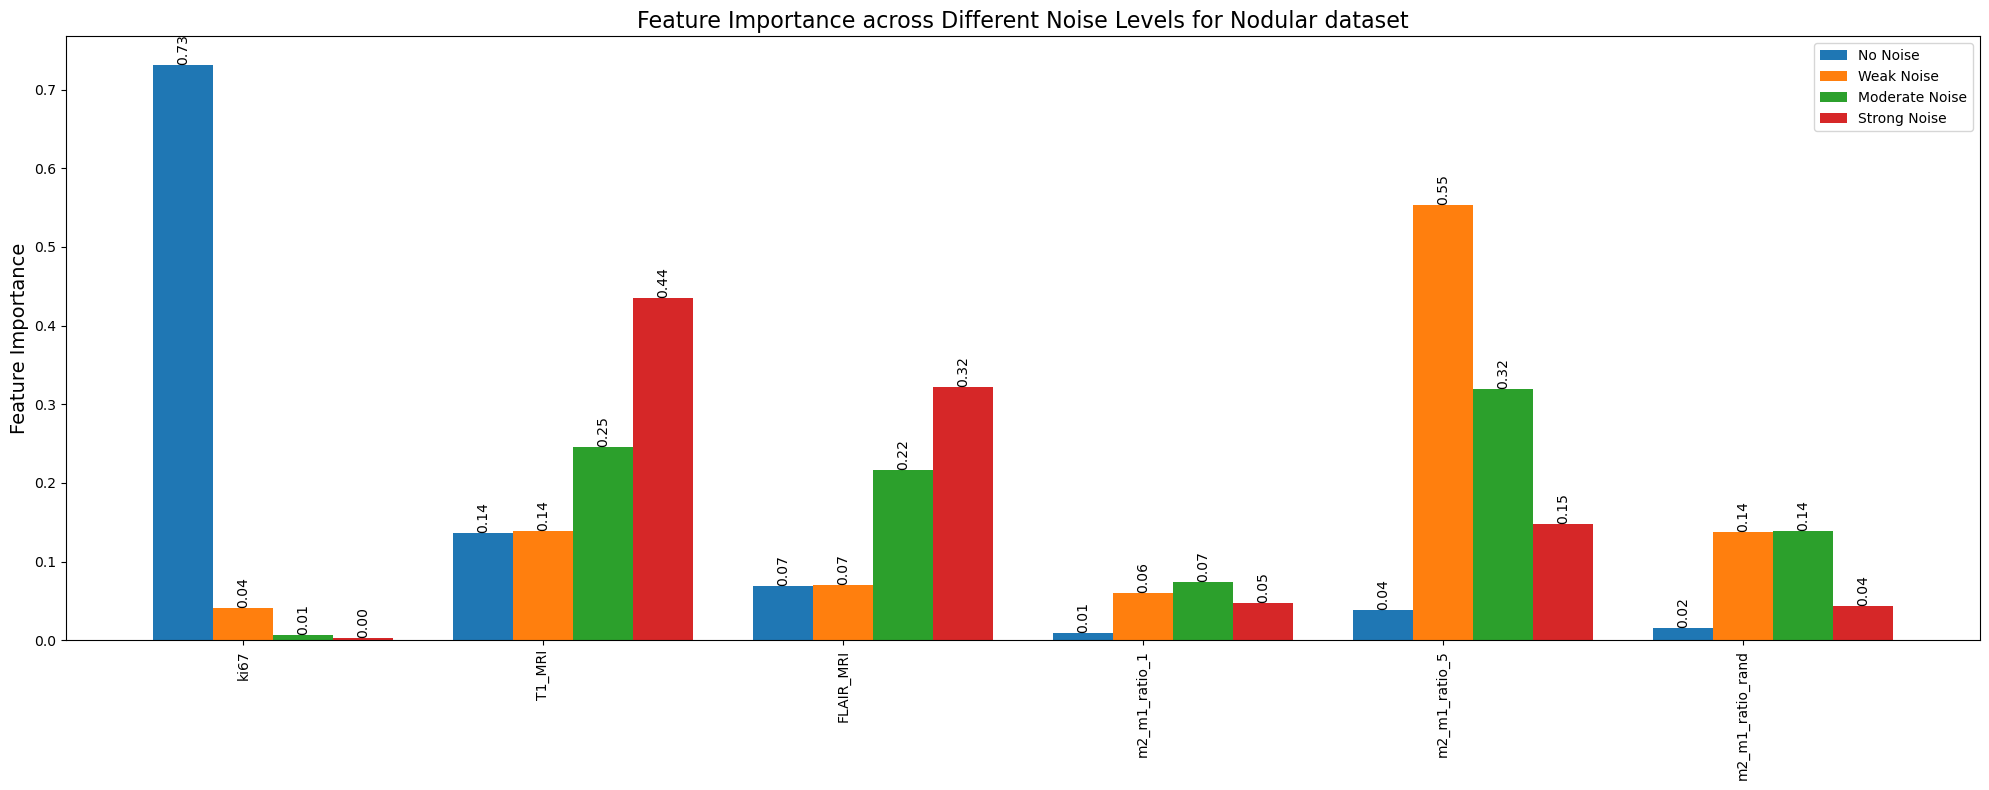

In [12]:
# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(20, 8))  # Adjusted figure size for better visibility
bars = []  # To keep track of bar containers for annotations
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    bar = plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)
    bars.append(bar)

# Annotate each bar with its value
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', rotation=90)

plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(positions + bar_width, features, rotation='vertical')
plt.title('Feature Importance across Different Noise Levels for Nodular dataset', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

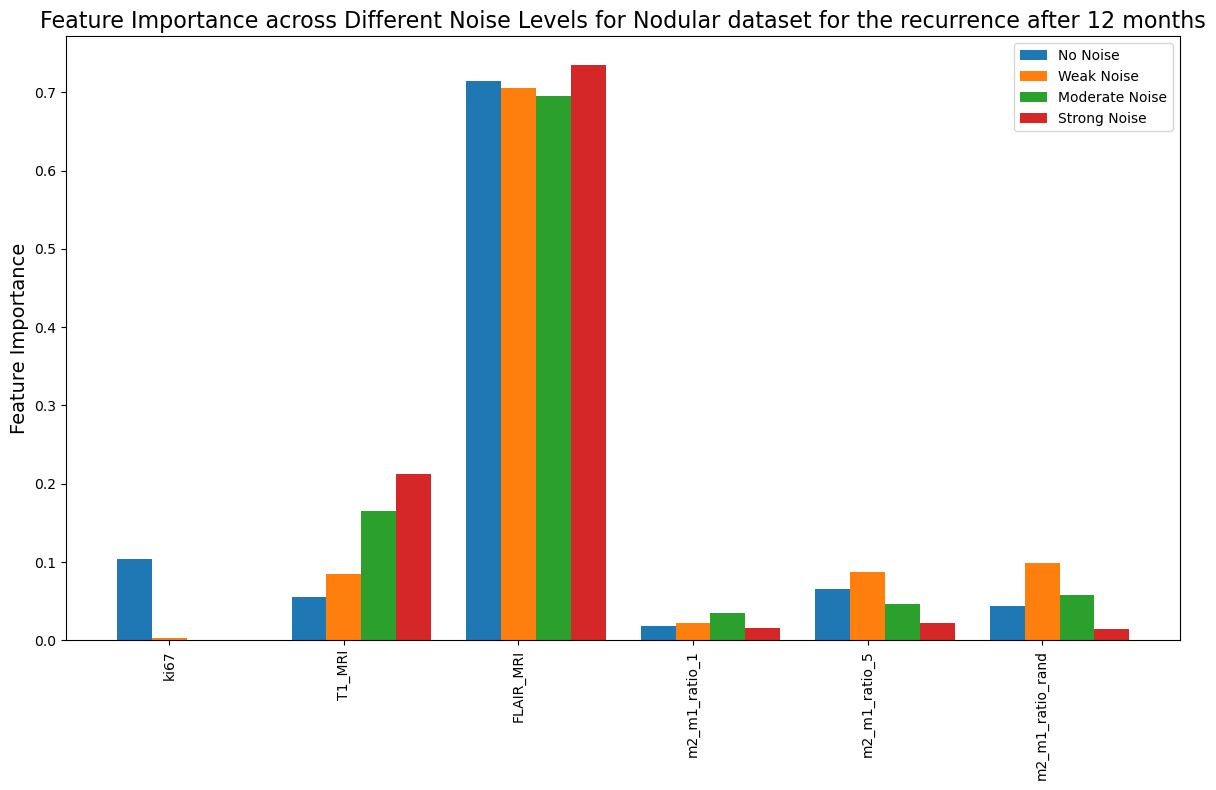

In [15]:
def get_feature_importances(dataset):
    # Prepare the features (X) and target (Y)
    X = dataset.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                              'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                              'm2_m1_ratio_3', 'm2_m1_ratio_4'])
    Y = dataset['IW_at3'].values

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    # Standardize the features
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    # Train the Gradient Boosting model on the standardized features
    gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
    gb_optimized.fit(X_train_standardized, Y_train)  # Use standardized features here

    # Return the feature importances
    feature_importance = gb_optimized.feature_importances_
    return feature_importance  

# Assuming datasets are prepared: nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise
datasets = {
    "No Noise": infiltrative_no_noise,
    "Weak Noise": infiltrative_weak_noise,
    "Moderate Noise": infiltrative_moderate_noise,
    "Strong Noise": infiltrative_strong_noise
}

# Prepare the features for labeling the x-axis in the plot
features = infiltrative_no_noise.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                                          'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                                          'm2_m1_ratio_3', 'm2_m1_ratio_4']).columns

# Initialize a dictionary to hold the feature importance from each dataset
all_importances = {noise_level: get_feature_importances(dataset) for noise_level, dataset in datasets.items()}

# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(12, 8))
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)

# Add xticks on the middle of the group bars
# plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(positions + bar_width, features, rotation='vertical')
plt.title('Feature Importance across Different Noise Levels for Nodular dataset for the recurrence after 12 months', fontsize=16)

# Create legend & Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

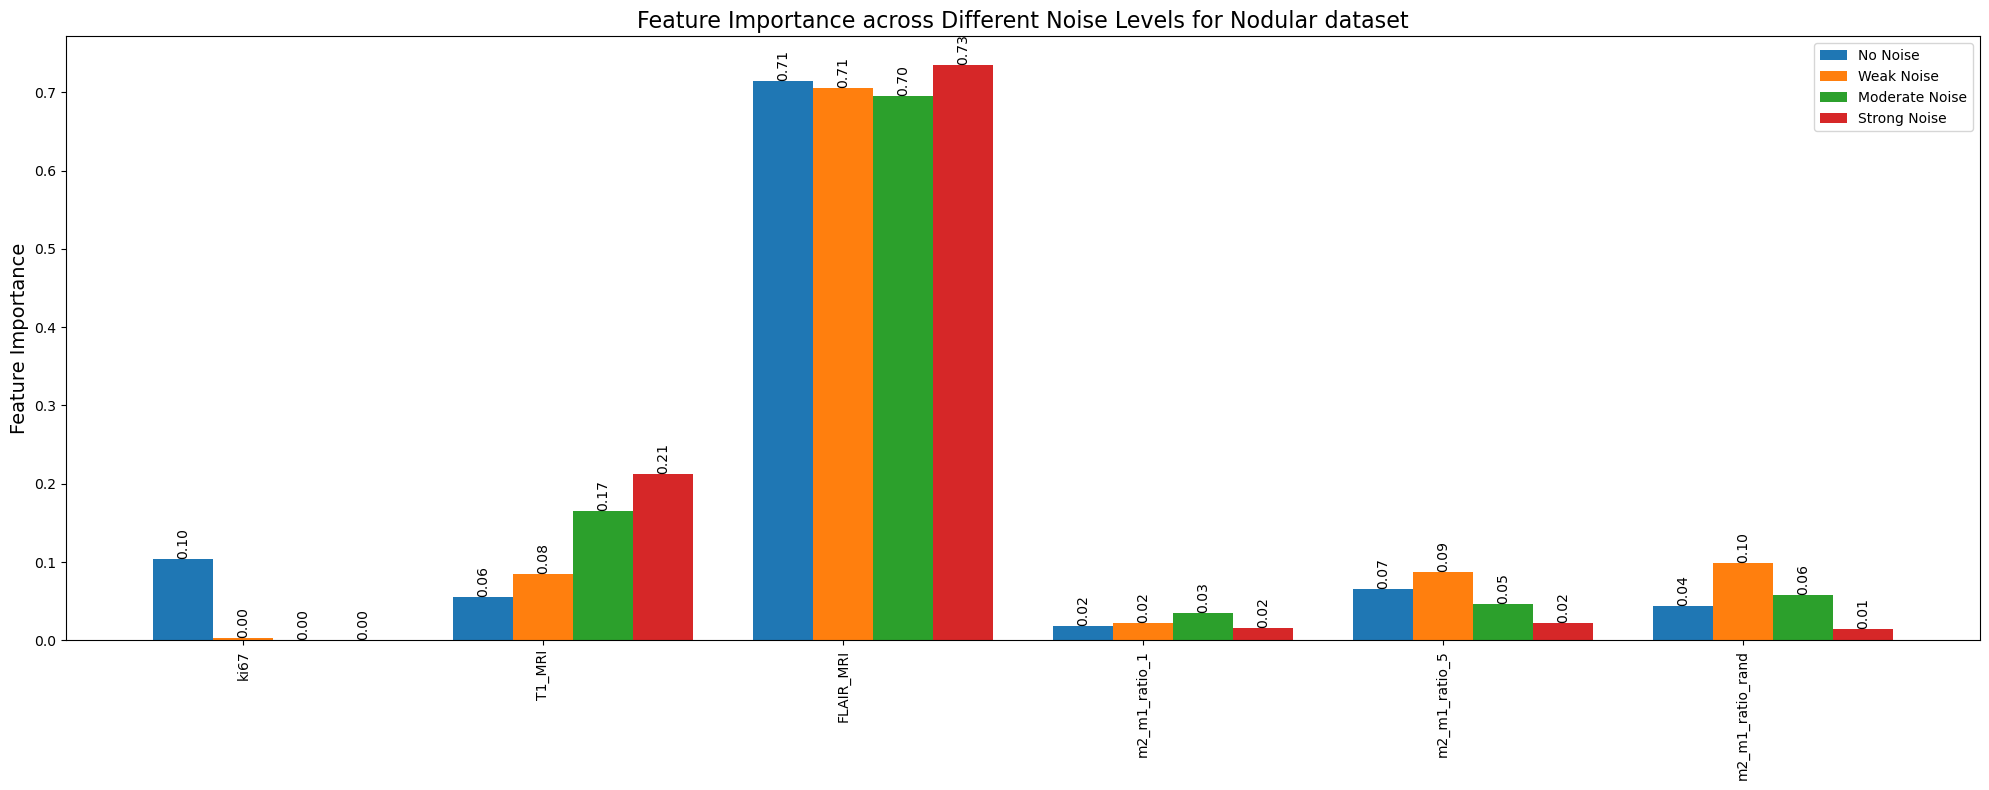

In [16]:
# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(20, 8))  # Adjusted figure size for better visibility
bars = []  # To keep track of bar containers for annotations
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    bar = plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)
    bars.append(bar)

# Annotate each bar with its value
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', rotation=90)

plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(positions + bar_width, features, rotation='vertical')
plt.title('Feature Importance across Different Noise Levels for Nodular dataset', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# scenarios = {
#     'I': ['ki67','m2_m1_ratio_5'],
#     'II':['ki67', 'm2_m1_ratio_rand'],
#     'III':['m2_m1_ratio_5']
# }

In [56]:
datasets = {
    "No Noise": infiltrative_no_noise,
    "Weak Noise": infiltrative_weak_noise,
    "Moderate Noise": infiltrative_moderate_noise,
    "Strong Noise": infiltrative_strong_noise
}
scenarios = {
    'I': ['ki67', 'T1_MRI','FLAIR_MRI'],
    'II':['ki67','T1_MRI','FLAIR_MRI', 'm2_m1_ratio_rand'],
    'III':['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_1'],
    'IV':['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_5'],
    'V':['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_1','m2_m1_ratio_5'],
}
# Initialize results storage
results = {'Scenario': [], 'Dataset': [], 'MSE': [], 'R2': []}



gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)

# Loop through each dataset and scenario combination
for dataset_name, dataset in datasets.items():
    for scenario_name, features in scenarios.items():
        X = dataset[features].values
        Y = dataset['IW_at3'].values  # Adjust the target column name as necessary
        
        # Splitting the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
        # Standardization
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training the model
        gb_optimized.fit(X_train_scaled, Y_train)
        
        # Predicting the test set results
        Y_pred = gb_optimized.predict(X_test_scaled)
        
        # Evaluating the model
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        # Storing results
        results['Scenario'].append(scenario_name)
        results['Dataset'].append(dataset_name)
        results['MSE'].append(mse)
        results['R2'].append(r2)

# Converting results to a DataFrame for easier handling
results_df = pd.DataFrame(results)

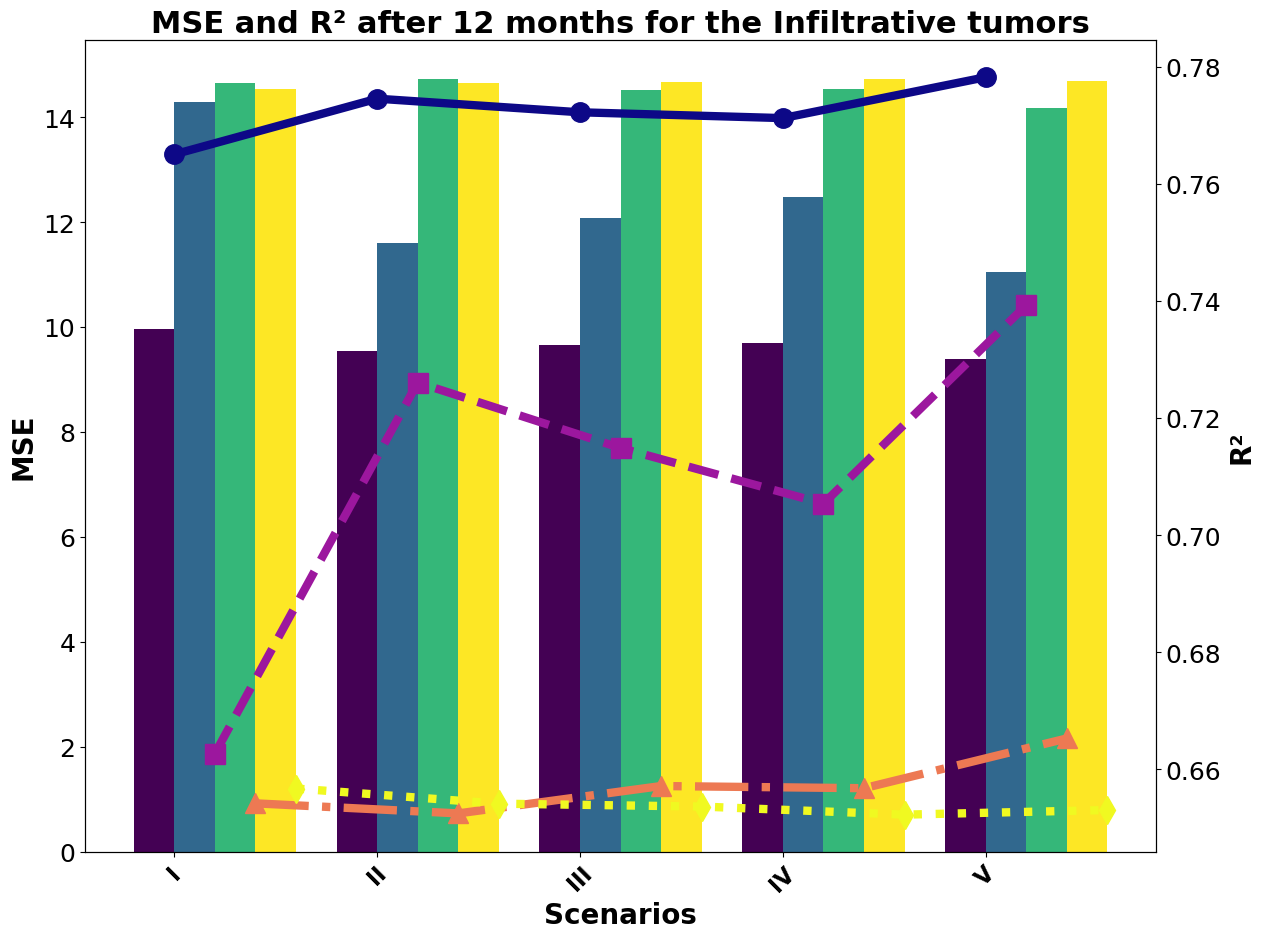

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming results_df, scenarios, and datasets are predefined
ind = np.arange(len(scenarios))  # The x locations for the groups
width = 0.2  # The width of the bars

# Start plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define color palettes for MSE bars and R² lines
mse_colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))  # Generating a color map for MSE bars
r2_colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))  # Generating a color map for R² lines

# Define different line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'd']  # Different markers for each line

# Plotting MSE bars
for i, dataset in enumerate(datasets):
    mse_values = results_df[results_df['Dataset'] == dataset]['MSE']
    ax1.bar(ind + i * width, mse_values, width, color=mse_colors[i], label=f'{dataset} MSE')

# Configure the first y-axis (ax1)
ax1.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
ax1.set_ylabel('MSE', fontsize=20, fontweight='bold')
ax1.set_title('MSE and R² after 12 months for the Infiltrative tumors', fontsize=22, fontweight='bold')
ax1.set_xticks(ind + width / 2)  # Adjusting x-ticks to the middle of the group of bars
ax1.set_xticklabels(scenarios, rotation=45, fontsize=16, fontweight='bold')

# Placing MSE legend outside the plot to the top left
# ax1.legend(loc='upper left', bbox_to_anchor=(-0.55, 0.01), title="MSE", fontsize=14, title_fontsize=16, frameon=True, shadow=True)

# Instantiate the second y-axis (ax2) for R² values
ax2 = ax1.twinx()
ax2.set_ylabel('R²', fontsize=20, fontweight='bold')
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
# Plotting R² with markers centered on the bars
for i, dataset in enumerate(datasets):
    r2_values = results_df[results_df['Dataset'] == dataset]['R2']
    ax2.plot(ind + i * width + width / 2, r2_values, color=r2_colors[i], marker=markers[i], linestyle=line_styles[i], linewidth=6, markersize=14, label=f'{dataset} R²')

# Placing R² legend outside the plot to the top right
# ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 0.01), title="R²", fontsize=16, title_fontsize=16, frameon=True, shadow=True)

fig.set_size_inches(w=15, h=10)  # Adjust as necessary
plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Adjust rect as necessary to prevent clipping
plt.show()


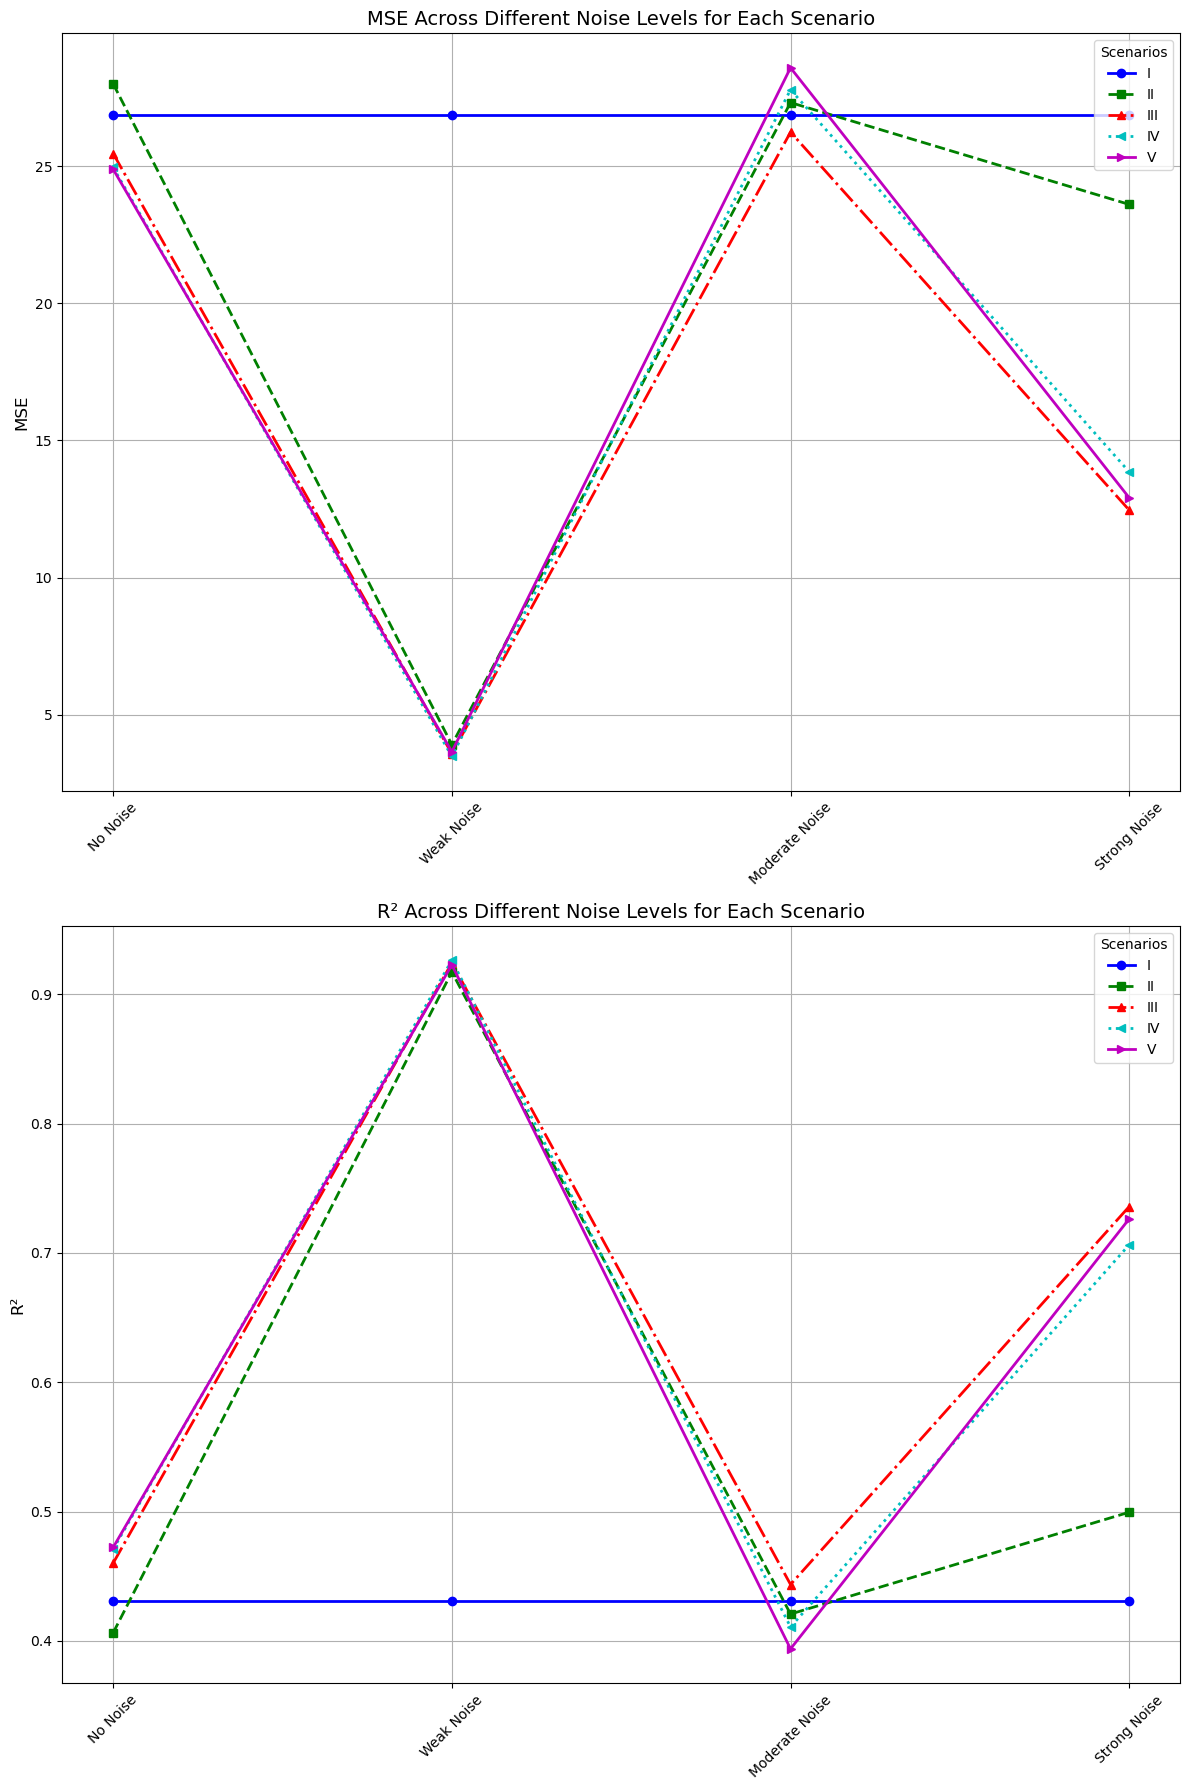

In [32]:
# Assuming results_df is already defined and contains the necessary columns
scenarios = results_df['Scenario'].unique()
datasets = results_df['Dataset'].unique()

# Setup for line styles and markers to differentiate each scenario
markers = ['o', 's', '^', '<', '>']  # Extend as needed
line_styles = ['-', '--', '-.', ':']  # Extend as needed
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend as needed if you have more scenarios

# Preparing the dataset order for plotting
dataset_order = np.arange(len(datasets))

# Creating two plots, one for MSE and one for R²
fig, (ax_mse, ax_r2) = plt.subplots(2, 1, figsize=(12, 18))

for idx, scenario in enumerate(scenarios):
    # Extracting MSE and R² for the current scenario across different datasets
    scenario_data = results_df[results_df['Scenario'] == scenario].sort_values(by='Dataset')
    mse_values = scenario_data['MSE'].values
    r2_values = scenario_data['R2'].values
    
    # Plotting MSE
    ax_mse.plot(dataset_order, mse_values, label=scenario, color=colors[idx % len(colors)], marker=markers[idx % len(markers)], linestyle=line_styles[idx % len(line_styles)], linewidth=2)
    
    # Plotting R²
    ax_r2.plot(dataset_order, r2_values, label=scenario, color=colors[idx % len(colors)], marker=markers[idx % len(markers)], linestyle=line_styles[idx % len(line_styles)], linewidth=2)

# Setting titles
ax_mse.set_title('MSE Across Different Noise Levels for Each Scenario', fontsize=14)
ax_r2.set_title('R² Across Different Noise Levels for Each Scenario', fontsize=14)

# Setting x-axis labels to dataset names
ax_mse.set_xticks(dataset_order)
ax_mse.set_xticklabels(datasets, rotation=45)
ax_r2.set_xticks(dataset_order)
ax_r2.set_xticklabels(datasets, rotation=45)

# Adding y-axis labels
ax_mse.set_ylabel('MSE', fontsize=12)
ax_r2.set_ylabel('R²', fontsize=12)

# Adding legends
ax_mse.legend(title='Scenarios', loc='upper right')
ax_r2.legend(title='Scenarios', loc='upper right')

# Adding grid for better readability
ax_mse.grid(True)
ax_r2.grid(True)

plt.tight_layout()
plt.show()

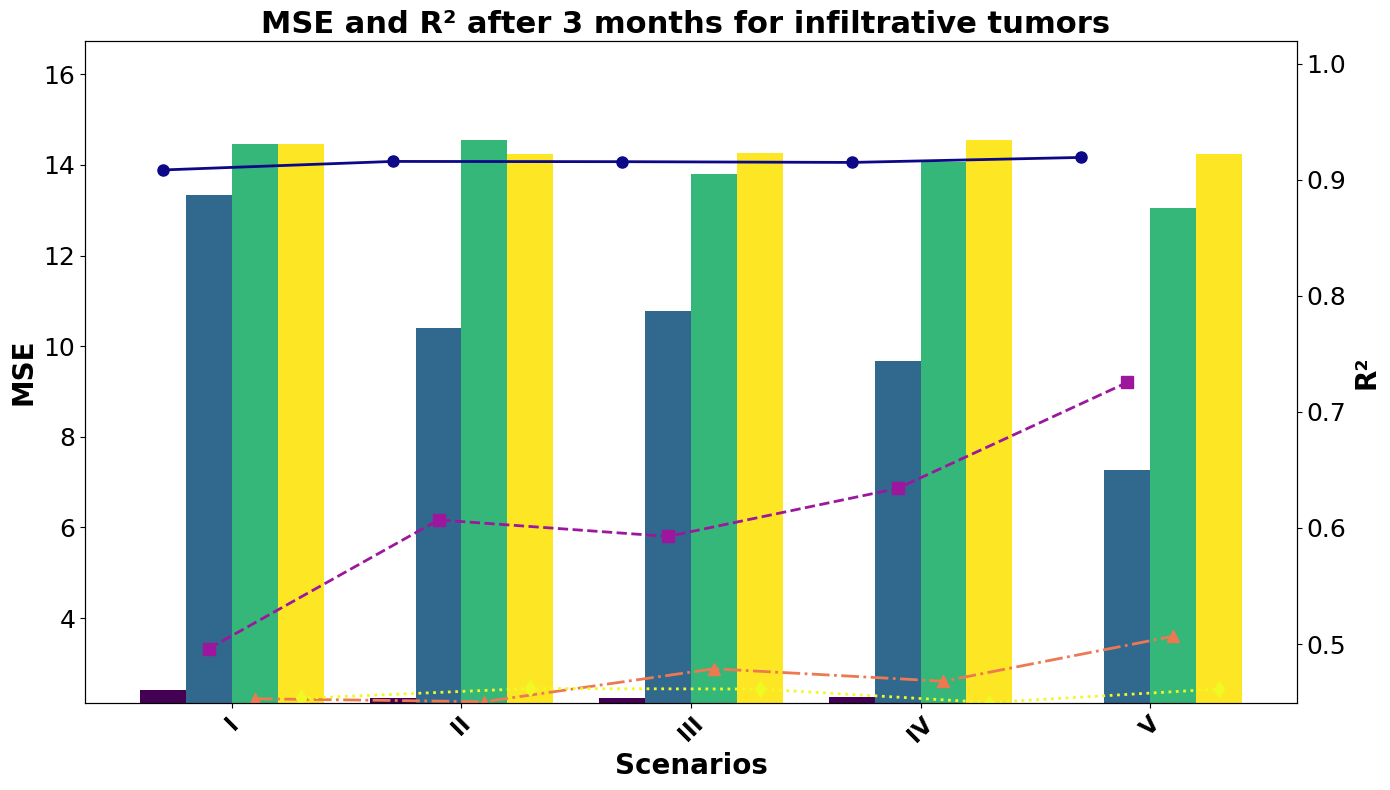

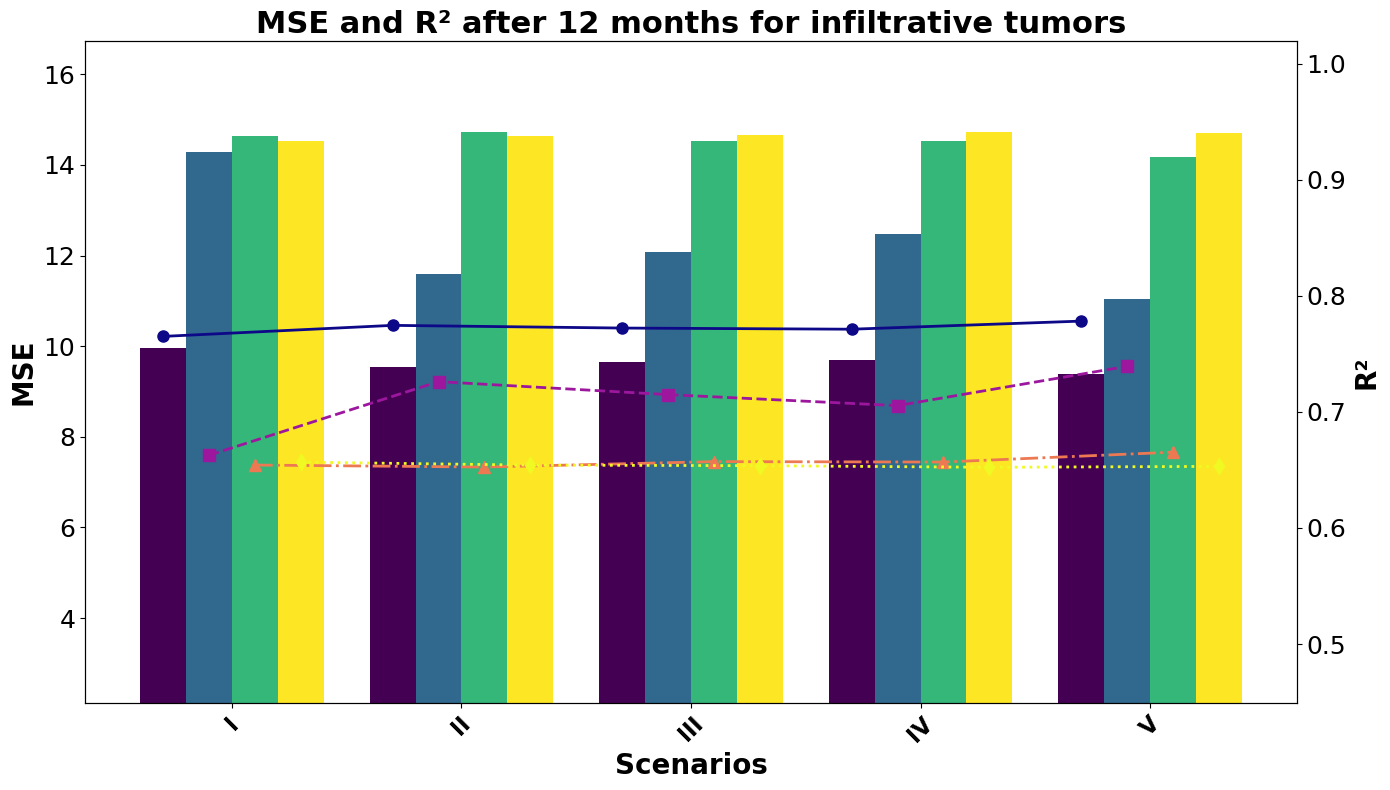

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datasets and scenarios setup (assuming your datasets are loaded)
datasets = {
    "No Noise": infiltrative_no_noise,
    "Weak Noise": infiltrative_weak_noise,
    "Moderate Noise": infiltrative_moderate_noise,
    "Strong Noise": infiltrative_strong_noise
}
scenarios = {
    'I': ['ki67', 'T1_MRI', 'FLAIR_MRI'],
    'II': ['ki67', 'T1_MRI', 'FLAIR_MRI', 'm2_m1_ratio_rand'],
    'III': ['ki67', 'T1_MRI', 'FLAIR_MRI', 'm2_m1_ratio_1'],
    'IV': ['ki67', 'T1_MRI', 'FLAIR_MRI', 'm2_m1_ratio_5'],
    'V': ['ki67', 'T1_MRI', 'FLAIR_MRI', 'm2_m1_ratio_1', 'm2_m1_ratio_5'],
}

# Initialize results storage
results = {'Scenario': [], 'Dataset': [], 'TimePoint': [], 'MSE': [], 'R2': []}

# Initialize the model
gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)

# Loop through each dataset and scenario combination
for dataset_name, dataset in datasets.items():
    for scenario_name, features in scenarios.items():
        X = dataset[features].values
        Y = dataset['IW_at1'].values  # Target for time point 1
        Y2 = dataset['IW_at3'].values  # Target for time point 3
        
        # Splitting the data for IW_at1
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
        # Standardization
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training the model for IW_at1
        gb_optimized.fit(X_train_scaled, Y_train)
        
        # Predicting the test set results for IW_at1
        Y_pred = gb_optimized.predict(X_test_scaled)
        
        # Evaluating the model for IW_at1
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        # Storing results for IW_at1
        results['Scenario'].append(scenario_name)
        results['Dataset'].append(dataset_name)
        results['TimePoint'].append('IW_at1')
        results['MSE'].append(mse)
        results['R2'].append(r2)
        
        # Splitting the data for IW_at3
        X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)
        
        # Standardization (use the same scaler as before)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training the model for IW_at3
        gb_optimized.fit(X_train_scaled, Y2_train)
        
        # Predicting the test set results for IW_at3
        Y2_pred = gb_optimized.predict(X_test_scaled)
        
        # Evaluating the model for IW_at3
        mse2 = mean_squared_error(Y2_test, Y2_pred)
        r2_2 = r2_score(Y2_test, Y2_pred)
        
        # Storing results for IW_at3
        results['Scenario'].append(scenario_name)
        results['Dataset'].append(dataset_name)
        results['TimePoint'].append('IW_at3')
        results['MSE'].append(mse2)
        results['R2'].append(r2_2)

# Converting results to a DataFrame for easier handling
results_df = pd.DataFrame(results)

# Define y-axis limits based on data
mse_min = min(results_df['MSE'])
mse_max = max(results_df['MSE'])
r2_min = min(results_df['R2'])
r2_max = max(results_df['R2'])

# Plotting setup
ind = np.arange(len(scenarios))  # The x locations for the groups
width = 0.2  # The width of the bars

fig1, ax1 = plt.subplots(figsize=(14, 8))

# Plotting MSE bars for IW_at1
for i, dataset in enumerate(datasets):
    mse_values_at1 = results_df[(results_df['Dataset'] == dataset) & (results_df['TimePoint'] == 'IW_at1')]['MSE']
    ax1.bar(ind + i * width, mse_values_at1, width, color=mse_colors[i], align='center')

# Configure the first y-axis (ax1)
ax1.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
ax1.set_ylabel('MSE', fontsize=20, fontweight='bold')
ax1.set_title('MSE and R² after 3 months for infiltrative tumors ', fontsize=22, fontweight='bold')  # Updated title for IW_at1
ax1.set_xticks(ind + width * (len(datasets) - 1) / 2)
ax1.set_xticklabels(scenarios, rotation=45, fontsize=16, fontweight='bold')
ax1.set_ylim([mse_min, mse_max + 2])

# Instantiate the second y-axis (ax2) for R² values for IW_at1
ax2 = ax1.twinx()
ax2.set_ylabel('R²', fontsize=20, fontweight='bold')
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylim([r2_min, r2_max + 0.1])

# Plotting R² with markers centered on the bars for IW_at1
for i, dataset in enumerate(datasets):
    r2_values_at1 = results_df[(results_df['Dataset'] == dataset) & (results_df['TimePoint'] == 'IW_at1')]['R2']
    ax2.plot(ind + i * width, r2_values_at1, color=r2_colors[i], marker=markers[i], linestyle=line_styles[i], linewidth=2, markersize=8)

# Save the first plot as high-quality PNG
fig1.savefig('MSE_R2_IW_at1_infil.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Start plotting for IW_at3
fig2, ax3 = plt.subplots(figsize=(14, 8))

# Plotting MSE bars for IW_at3
for i, dataset in enumerate(datasets):
    mse_values_at3 = results_df[(results_df['Dataset'] == dataset) & (results_df['TimePoint'] == 'IW_at3')]['MSE']
    ax3.bar(ind + i * width, mse_values_at3, width, color=mse_colors[i], align='center')

# Configure the first y-axis (ax3)
ax3.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
ax3.set_ylabel('MSE', fontsize=20, fontweight='bold')
ax3.set_title('MSE and R² after 12 months for infiltrative tumors', fontsize=22, fontweight='bold')  # Updated title for IW_at3
ax3.set_xticks(ind + width * (len(datasets) - 1) / 2)
ax3.set_xticklabels(scenarios, rotation=45, fontsize=16, fontweight='bold')
ax3.set_ylim([mse_min, mse_max + 2])

# Instantiate the second y-axis (ax4) for R² values for IW_at3
ax4 = ax3.twinx()
ax4.set_ylabel('R²', fontsize=20, fontweight='bold')
ax3.tick_params(axis='y', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_ylim([r2_min, r2_max + 0.1])

# Plotting R² with markers centered on the bars for IW_at3
for i, dataset in enumerate(datasets):
    r2_values_at3 = results_df[(results_df['Dataset'] == dataset) & (results_df['TimePoint'] == 'IW_at3')]['R2']
    ax4.plot(ind + i * width, r2_values_at3, color=r2_colors[i], marker=markers[i], linestyle=line_styles[i], linewidth=2, markersize=8)

# Save the second plot as high-quality PNG
fig2.savefig('MSE_R2_IW_at3_infil.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
